In [9]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("hrdkcodes/wine-data")
print("Path to dataset files:", path)


100%|██████████| 4.31k/4.31k [00:00<00:00, 5.54MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/hrdkcodes/wine-data/versions/1


Files in dataset directory: ['wine.csv']
Explained variance ratio: [0.41015058 0.16525123]
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


<ipython-input-11-0b5b2f59d9a2>:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


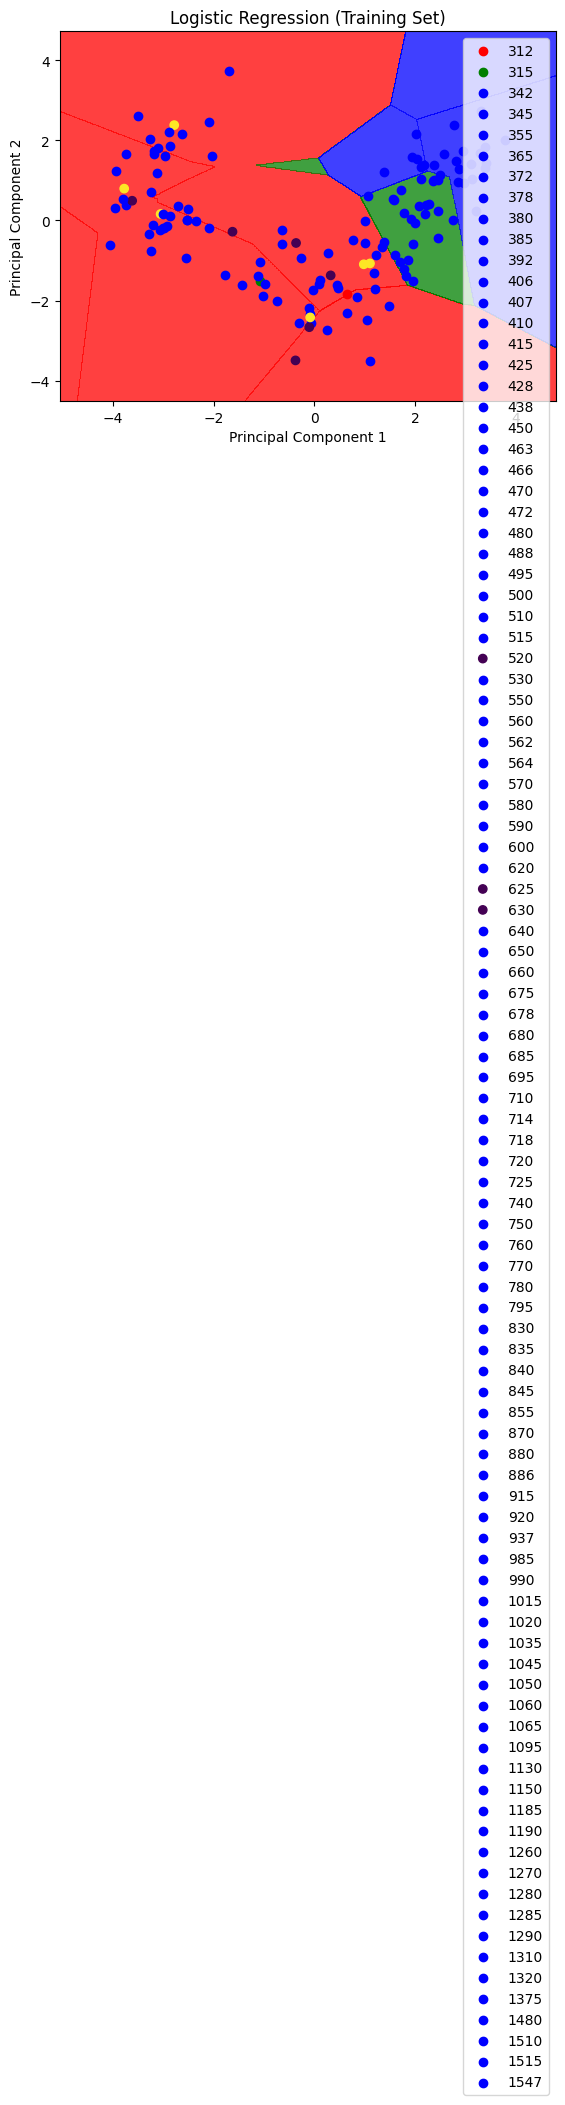

<ipython-input-11-0b5b2f59d9a2>:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


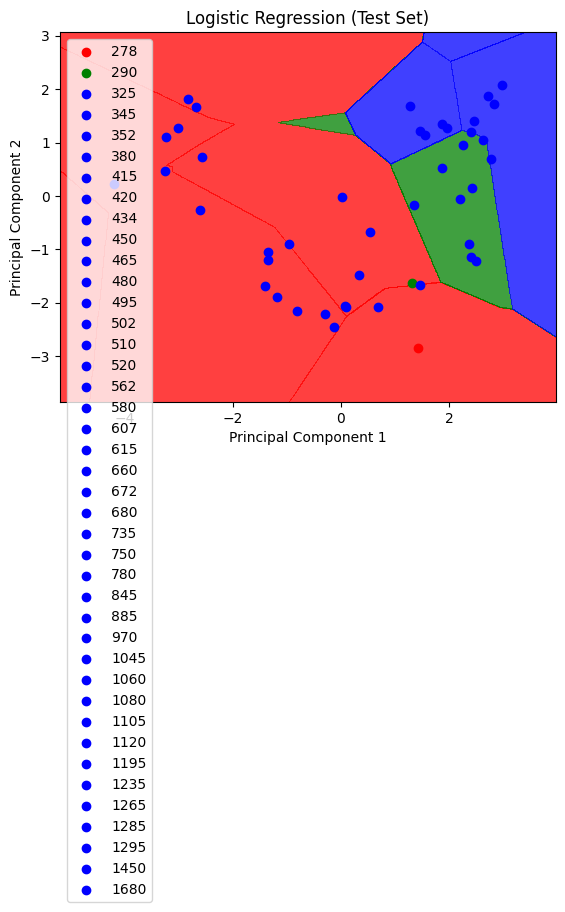

In [11]:
# Step 1: Import Necessary Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Step 2: Define the Dataset Path
dataset_path = "/kaggle/input/wine-data"  # Make sure this matches your dataset location

# Step 3: Load and Confirm File Exists
print("Files in dataset directory:", os.listdir(dataset_path))  # Check for correct filename
csv_file = os.path.join(dataset_path, "wine.csv")  # ✅ Correct lowercase filename
dataset = pd.read_csv(csv_file)

# Step 4: Separate Features and Target Variable
X = dataset.iloc[:, :-1].values  # All columns except last
y = dataset.iloc[:, -1].values   # Last column is target

# Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Step 6: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 7: Apply PCA (2 components)
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# Print variance ratio for info
explained_variance = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance)

# Step 8: Train Logistic Regression Classifier
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Step 9: Evaluate Model
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Step 10: Visualize Results
def plot_decision_boundary(X_set, y_set, title):
    X1, X2 = np.meshgrid(
        np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
        np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
    )
    plt.contourf(
        X1, X2,
        classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
        alpha=0.75,
        cmap=ListedColormap(("red", "green", "blue"))
    )
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(
            X_set[y_set == j, 0],
            X_set[y_set == j, 1],
            c=ListedColormap(("red", "green", "blue"))(i),
            label=j
        )
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.legend()
    plt.show()

# Training set visualization
plot_decision_boundary(X_train, y_train, "Logistic Regression (Training Set)")

# Test set visualization
plot_decision_boundary(X_test, y_test, "Logistic Regression (Test Set)")
